<h1 align='center'>11.1 Time Series Basics

The  Python  standard  library  includes  data  types  for  date  and  time  data,  as  well  ascalendar-related  functionality.  

The  datetime,  time,  and  calendar  modules  are  themain  places  to  start

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

In [2]:
now = datetime.now()
now

datetime.datetime(2020, 10, 30, 9, 44, 16, 336486)

In [4]:
now.year

2020

datetime stores both the date and time down to the microsecond. timedelta repre‐sents the temporal difference between two datetime objects:

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days

926

You  can  add  (or  subtract)  a  timedelta  or  multiple  thereof  to  a  datetime  object  toyield a new shifted object

In [10]:
start = datetime(2011, 1, 7)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

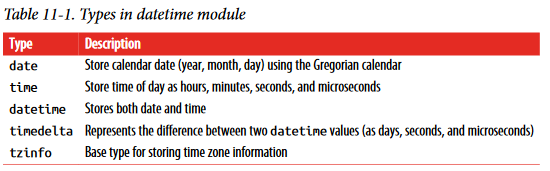

<b>Converting Between String and Datetime

You can format datetime objects and pandas Timestamp objects, which I’ll introducelater, as strings using str or the strftime method, passing a format specification:

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

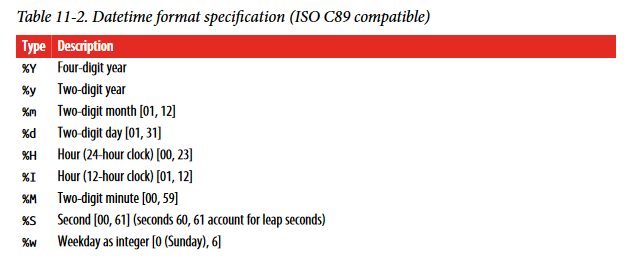

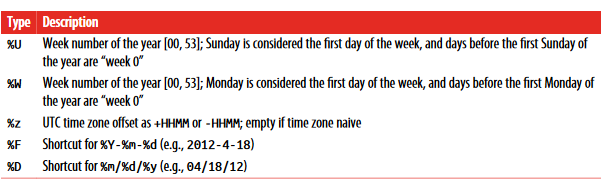

You  can  use  these  same  format  codes  to  convert  strings  to  dates  using  datetime.strptime:

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime  is  a  good  way  to  parse  a  date  with  a  known  format.  However,  itcan be a bit annoying to have to write a format spec each time, especially for commondate  formats.  In  this  case,  you  can  use  the  parser.parse  method  in  the  third-partydateutil package 

In [20]:
from dateutil.parser import parse

In [23]:
parse(str(datetime.now()))

datetime.datetime(2020, 10, 30, 10, 16, 26, 96080)

In [24]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In international locales, day appearing before month is very common, so you can passdayfirst=True

In [25]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

The  to_datetime  method  parses  many  dif‐ferent  kinds  of  date  representations.  Standard  date  formats  like  ISO  8601  can  beparsed very quickly

In [28]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [29]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [30]:
idx[2]

NaT

NaT (Not a Time) is pandas’s null value for timestamp data.

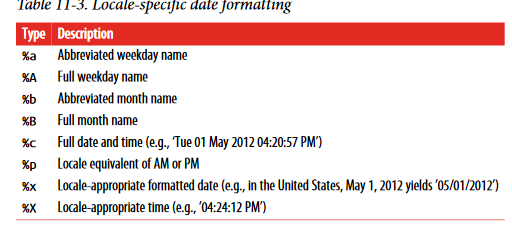

In [32]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [35]:
ts = pd.Series(np.random.randn(6), index=dates)

In [36]:
ts + ts[::2]

2011-01-02   -0.973713
2011-01-05         NaN
2011-01-07   -3.109911
2011-01-08         NaN
2011-01-10   -1.388303
2011-01-12         NaN
dtype: float64

In [37]:
ts[::2]

2011-01-02   -0.486856
2011-01-07   -1.554956
2011-01-10   -0.694151
dtype: float64

<b>Indexing, Selection, Subsetting

For longer time series, a year or only a year and month can be passed to easily selectslices of data.

In [38]:
longer_ts = pd.Series(np.random.randn(1000),                          
                index=pd.date_range('1/1/2000', periods=1000))

In [39]:
longer_ts['2001']

2001-01-01    0.399848
2001-01-02    0.668153
2001-01-03   -2.794097
2001-01-04    0.280412
2001-01-05   -2.097322
                ...   
2001-12-27   -1.830971
2001-12-28   -1.652440
2001-12-29   -0.113704
2001-12-30    0.455572
2001-12-31    0.789951
Freq: D, Length: 365, dtype: float64

In [40]:
longer_ts['2001-05']

2001-05-01    0.976915
2001-05-02    0.825052
2001-05-03   -0.166718
2001-05-04   -0.347346
2001-05-05    0.878568
2001-05-06   -0.984031
2001-05-07    0.310223
2001-05-08    0.495396
2001-05-09   -0.646319
2001-05-10   -0.350325
2001-05-11   -1.503992
2001-05-12   -1.499654
2001-05-13   -0.114565
2001-05-14   -0.259687
2001-05-15   -1.315125
2001-05-16   -2.065515
2001-05-17    1.424054
2001-05-18   -0.113942
2001-05-19   -0.205847
2001-05-20   -1.034802
2001-05-21    1.927337
2001-05-22   -0.400146
2001-05-23   -0.295858
2001-05-24    0.877899
2001-05-25    0.662520
2001-05-26   -1.126614
2001-05-27   -1.863059
2001-05-28   -1.229693
2001-05-29    0.692614
2001-05-30   -0.922268
2001-05-31    1.272663
Freq: D, dtype: float64

In [41]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.554956
2011-01-08   -0.787287
2011-01-10   -0.694151
2011-01-12    0.010135
dtype: float64

There  is  an  equivalent  instance  method,  truncate,  that  slices  a  Series  between  twodates:

In [42]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.486856
2011-01-05    1.207715
2011-01-07   -1.554956
2011-01-08   -0.787287
dtype: float64

All of this holds true for DataFrame as well, indexing on its rows:

In [43]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),index=dates,
                           columns=['Colorado', 'Texas','New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.192954,-0.032982,0.710000,0.156033
2001-05-09,1.089943,0.630211,0.019687,0.195526
2001-05-16,-0.015436,-0.573437,0.403088,-0.343676
2001-05-23,-1.202587,-0.391460,-0.668410,-1.423458
2001-05-30,-0.114930,0.519390,0.892011,0.641256


<b>Time Series with Duplicate Indices

In [44]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [45]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [46]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [47]:
dup_ts.index.is_unique

False

In [48]:
grouped = dup_ts.groupby(level=0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64